Телеком — задача проекта
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

1  Описание услуг
Оператор предоставляет два основных типа услуг:

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны такие услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

2  Описание данных
Данные состоят из файлов, полученных из разных источников:

contract_new.csv — информация о договоре;
personal_new.csv — персональные данные клиента;
internet_new.csv — информация об интернет-услугах;
phone_new.csv — информация об услугах телефонии.
Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Описание полей
customerID - код клиента у всех таблиц

contract
BeginDate – дата начала контракта и соответвенно пользование услугами телекома
EndDate – дата окончания пользования услугами
Type – тип оплаты: ежемесячный, годовой, на 2 года
PaperlessBilling – безналичный расчет
PaymentMethod – способ оплаты:Electronic check,Mailed check,Bank transfer(aut.),Credit card (automat.)
MonthlyCharges – ежемесячные траты, расходы(Charges) на услуги.
TotalCharges – всего потрачено денег на услуги.

personal
gender - соответсвенно пол
Senior Citizen – пенсионный статус по возрасту
Partner – наличие партнера,супруга(и)
Dependents – наличие иждивенцев в семье

internet
InternetService -подключение -через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic)
OnlineSecurity - блокировка небезопасных сайтов
OnlineBackup - резервное копирование данных в облако
DeviceProtection - антивирус
TechSupport - выделенная техподдержка
StreamingTV - стримминговое ТВ
StreamingMovies - каталог фильмов

phone
MultipleLines – подключение телефонного аппарата к нескольким линиям одновременно

# План работы   
1.Изучить рабочую задачу,рассмотреть описание полей(столбцов) файлов с даными.   
2.Изучить данные в файлах - проверить типы, есть ли пропуски, надо ли преобразовывать данные. Сделать первичный вывод   
3.Подготовка данных -провести предобработку, выделить целевой признак, подготовить фичи к обучению моделей.   
4.Выбор моделей, подбор гиперпараметров, проверка результатов, анализ лучшей модели.   
5.Итоговый вывод.   



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier



In [ ]:
contract_df = pd.read_csv('/datasets/contract_new.csv')
personal_df = pd.read_csv('/datasets/personal_new.csv')
internet_df = pd.read_csv('/datasets/internet_new.csv')
phone_df = pd.read_csv('/datasets/phone_new.csv')

In [ ]:
pip install phik

     |████████████████████████████████| 679 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81 kB 12 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from category_encoders.one_hot import OneHotEncoder

ознакомимся с данными, выведем на экран первые строки датасетов

In [ ]:
name = "contract_df","personal_df", "internet_df", "phone_df"
list = contract_df, personal_df,internet_df,phone_df
for i, element in enumerate(name):
    print(" ")
    print(name[i])
    display(list[i].head())


 
contract_df


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


 
personal_df


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


 
internet_df


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


 
phone_df


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


посмотрим набор значений в некоторых столбцах

In [ ]:
contract_df['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [ ]:
contract_df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
internet_df['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

посмотрим общую информацию

In [ ]:
name = "contract_df","personal_df", "internet_df", "phone_df"
list = contract_df, personal_df,internet_df,phone_df
for i, element in enumerate(name):
    print(" ")
    print(name[i])
    print(list[i].info())

 
contract_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
 
personal_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner    

In [ ]:
name = "contract_df","personal_df", "internet_df", "phone_df"
list = contract_df, personal_df,internet_df,phone_df
for i, element in enumerate(name):
    print(" ")
    print(name[i])
    display(list[i].describe())

 
contract_df


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


 
personal_df


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


 
internet_df


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3755-JBMNH,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


 
phone_df


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5453-YBTWV,No
freq,1,3390


посомтрим наличие пропусков

In [ ]:
name = "contract_df","personal_df", "internet_df", "phone_df"
list = contract_df, personal_df,internet_df,phone_df
for i, element in enumerate(name):
    print(" ")
    print(name[i])
    display(list[i].isna().sum())

 
contract_df


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

 
personal_df


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

 
internet_df


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

 
phone_df


customerID       0
MultipleLines    0
dtype: int64

Выводы по данным:    
Данные у нас представлены 4 отдельными таблицами, которые объедиянет customerID -код клиента, именно по нему можно будет объединить таблицы в один датасет, чтобы проводить действия с одной общей таблицей. В представленных таблицах отсутствуют пропуски, кроме небольшого количетсва неявных в TotalCharges. В данных таблиц contract_df и personal_df 7043 записи, по сути именно такое количество клиентов нам представлено для анализа.
Данных немного, поэтому будем вниметельны, чтобы при объединении таблиц сохранить их все, не удалять вероятные пропуски, а заполнить их подходящими для анализа значениями. Ведь в таблицах internet_df и phone_df меньше строк 5517 и 6361 соответственно, а значит при слиянии появятся пробелы.Причина не соответсвия количества записей скорее всего в том, что этими услугами некоторые абоненты не пользовались. BeginDate и EndDate надо перевести в формат даты, No в EndDate означает, что пользователь продолжает пользоваться услугами - это целевой признак.Нужно будет заменить No на 01.02.2020 в EndDate. TotalCharges надо перевести в числовой тип,заполнить неявные пропуски.MonthlyCharges в целочисленный.        

In [ ]:
contract_df.loc[contract_df['TotalCharges']==' ']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [ ]:
contract_df.loc[contract_df['BeginDate']=='2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


при доп. исследовании выявили неявные пропуски в contract_df['TotalCharges'] в них ' ', выяснили, что это те, кто стали клиентами 2020-02-01, у них в таблице прописаны расходы за месяц,получается их общие расходы равны месячным расходам, сделаем соответсвующую замену

# Второй этап   
   
   


3.Пункт из плана.Выполним подготовку данных. Для этого необходимо будет провести предобработку, выделить целевой признак, подготовить фичи к обучению моделей.

In [ ]:
contract_df['TotalCharges'] = contract_df['TotalCharges'].replace([' '], 0)
contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('float')
contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('int')
contract_df['MonthlyCharges'] = contract_df['MonthlyCharges'].astype('int')

In [ ]:
contract_df['TotalCharges'] = np.where(contract_df['TotalCharges']== 0,contract_df['MonthlyCharges'],contract_df['TotalCharges'])

In [ ]:
contract_df[(contract_df['BeginDate']=='2020-02-01')]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52,52
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20,20
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80,80
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25,25
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56,56
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19,19
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25,25
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20,20
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19,19
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73,73


In [ ]:
contract_df['EndDate'] = contract_df['EndDate'].replace(['No'], ['2020-02-01'])

In [ ]:
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'],format = '%Y-%m-%d')
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'],format = '%Y-%m-%d')

In [ ]:
contract_df['Stay'] = (contract_df['EndDate'] - contract_df['BeginDate']).dt.days

In [ ]:
contract_df[(contract_df['BeginDate']=='2020-02-01')]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52,52,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20,20,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80,80,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25,25,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56,56,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19,19,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25,25,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20,20,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19,19,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73,73,0


In [ ]:
tecom_df = contract_df.set_index('customerID').join(phone_df.set_index('customerID'))
tecom_df = tecom_df.join(personal_df.set_index('customerID'))
tecom_df = tecom_df.join(internet_df.set_index('customerID'))

In [ ]:
tecom_df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29,31,31,NaN,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56,2071,1036,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53,226,123,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42,1960,1371,NaN,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70,353,153,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
tecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   int64         
 6   TotalCharges      7043 non-null   int64         
 7   Stay              7043 non-null   int64         
 8   MultipleLines     6361 non-null   object        
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity

заполним появившиеся пропуски отметкой tel  net для тех кто пользуется только телефоном или только интернетом, есть "искушение" поставить yes или no, но тогда будет искажение данных, например, что у тех, кто не пользуется телефоном нет мультисоединения, но есть одна линия, однако у них нет вообще телефонной связи     

In [ ]:
tecom_df['MultipleLines'] = tecom_df['MultipleLines'].fillna('net')

In [ ]:
tecom_df[['InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
          'TechSupport','StreamingTV','StreamingMovies']] = tecom_df[['InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
          'TechSupport','StreamingTV','StreamingMovies']].fillna ('tel')

In [ ]:
tecom_df['Exit'] = 1
tecom_df.loc[tecom_df['EndDate'] == '2020-02-01', 'Exit'] = 0

In [ ]:
tecom_df.head(20)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay,MultipleLines,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Exit
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29,31,31,net,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56,2071,1036,No,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53,226,123,No,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42,1960,1371,net,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70,353,153,No,Female,...,No,No,Fiber optic,No,No,No,No,No,No,0
9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99,1150,337,Yes,Female,...,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,0
1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89,2058,671,Yes,Male,...,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,0
6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29,300,306,net,Female,...,No,No,DSL,Yes,No,No,No,No,No,0
7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104,3573,945,Yes,Female,...,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,0


In [ ]:
tecom_df['Exit'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: Exit, dtype: float64

присутствует дисбаланс классов, учтем это при установке параметров моделей   
далее удалим столбцы, которые уже не нужны для дальнейшего исследования

In [ ]:
tecom_df.reset_index(inplace=True)
tecom_df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
tecom_df.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [ ]:
tecom_df

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Exit
0,Month-to-month,Yes,Electronic check,29,31,31,net,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0
1,One year,No,Mailed check,56,2071,1036,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,0
2,Month-to-month,Yes,Mailed check,53,226,123,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,0
3,One year,No,Bank transfer (automatic),42,1960,1371,net,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0
4,Month-to-month,Yes,Electronic check,70,353,153,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84,2035,730,Yes,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,0
7039,One year,Yes,Credit card (automatic),103,7430,2191,Yes,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,0
7040,Month-to-month,Yes,Electronic check,29,325,337,net,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,0
7041,Month-to-month,Yes,Mailed check,74,520,215,Yes,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,0


In [ ]:
phik_ov = tecom_df.phik_matrix()

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Stay', 'SeniorCitizen', 'Exit']


In [ ]:
phik_ov

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Exit
Type,1.000000,0.106860,0.277462,0.391279,0.468599,0.634155,0.244410,0.000000,0.086231,0.179736,0.147680,0.505187,0.636884,0.581660,0.631531,0.671629,0.549564,0.553556,0.094015
PaperlessBilling,0.106860,1.000000,0.370495,0.467970,0.203035,0.026799,0.099953,0.000000,0.242133,0.013218,0.172593,0.231438,0.208320,0.195321,0.195687,0.200621,0.204717,0.202241,0.083398
PaymentMethod,0.277462,0.370495,1.000000,0.399384,0.335212,0.350964,0.174849,0.000000,0.292725,0.243008,0.224903,0.323886,0.315799,0.293413,0.297923,0.317713,0.284531,0.285525,0.214832
MonthlyCharges,0.391279,0.467970,0.399384,1.000000,0.713616,0.388447,0.708180,0.000000,0.308223,0.199513,0.183833,0.919159,0.812214,0.818959,0.827053,0.816452,0.863710,0.863037,0.228827
TotalCharges,0.468599,0.203035,0.335212,0.713616,1.000000,0.847327,0.467512,0.000000,0.137465,0.381131,0.082645,0.489574,0.516178,0.550174,0.558310,0.527567,0.555326,0.554313,0.304868
Stay,0.634155,0.026799,0.350964,0.388447,0.847327,1.000000,0.347289,0.000000,0.063315,0.453688,0.198729,0.060845,0.346398,0.366170,0.374702,0.353438,0.306675,0.307297,0.374569
MultipleLines,0.244410,0.099953,0.174849,0.708180,0.467512,0.347289,1.000000,0.000000,0.087925,0.086249,0.011198,0.739808,0.540261,0.562933,0.564610,0.541088,0.586049,0.586815,0.105101
gender,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.001460,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581
SeniorCitizen,0.086231,0.242133,0.292725,0.308223,0.137465,0.063315,0.087925,0.000000,1.000000,0.016992,0.324576,0.160702,0.127319,0.109995,0.110177,0.135283,0.111714,0.113778,0.086159
Partner,0.179736,0.013218,0.243008,0.199513,0.381131,0.453688,0.086249,0.000000,0.016992,1.000000,0.652122,0.000000,0.091202,0.092012,0.100092,0.076326,0.082251,0.077506,0.226688


<AxesSubplot:>

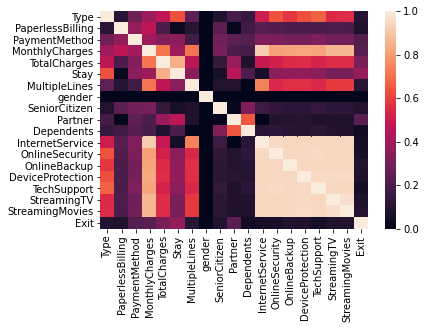

In [ ]:
sns.heatmap(phik_ov)

рассмотрение phik-корреляции показало, что можно оставить признаки влияние которых хотя бы больше 0.05, отметим, что из других заметно выделяются влиянием 5 признаков tecom_df[['PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Stay', 'Partner'...]], отметим их для дальнейшего исследования  после сравнения выводов с feature_importances_

In [ ]:
tecom_df = tecom_df.drop(columns=['gender', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport'])

In [ ]:
tecom_df

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Stay,MultipleLines,SeniorCitizen,Partner,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Exit
0,Month-to-month,Yes,Electronic check,29,31,31,net,0,Yes,Yes,No,No,No,0
1,One year,No,Mailed check,56,2071,1036,No,0,No,No,Yes,No,No,0
2,Month-to-month,Yes,Mailed check,53,226,123,No,0,No,Yes,No,No,No,0
3,One year,No,Bank transfer (automatic),42,1960,1371,net,0,No,No,Yes,No,No,0
4,Month-to-month,Yes,Electronic check,70,353,153,No,0,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84,2035,730,Yes,0,Yes,No,Yes,Yes,Yes,0
7039,One year,Yes,Credit card (automatic),103,7430,2191,Yes,0,Yes,Yes,Yes,Yes,Yes,0
7040,Month-to-month,Yes,Electronic check,29,325,337,net,0,Yes,No,No,No,No,0
7041,Month-to-month,Yes,Mailed check,74,520,215,Yes,1,Yes,No,No,No,No,0


In [ ]:
tecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Type              7043 non-null   object
 1   PaperlessBilling  7043 non-null   object
 2   PaymentMethod     7043 non-null   object
 3   MonthlyCharges    7043 non-null   int64 
 4   TotalCharges      7043 non-null   int64 
 5   Stay              7043 non-null   int64 
 6   MultipleLines     7043 non-null   object
 7   SeniorCitizen     7043 non-null   int64 
 8   Partner           7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Exit              7043 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 770.5+ KB


выделим таргет и фичи, разобьем выборку на трейн и тест

In [ ]:
target = tecom_df['Exit']
features = tecom_df.drop(columns=['Exit'])

In [ ]:
RANDOM=220523

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM)

In [ ]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((5282, 13), (5282,), (1761, 13), (1761,))

In [ ]:
#features_train = pd.get_dummies(features_train, drop_first=True)


In [ ]:
#cat_cols = ['Type','PaperlessBilling', 'PaymentMethod', 'MultipleLines', 'Partner', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']


In [ ]:
ohenc = OneHotEncoder()
features_train = pd.DataFrame(ohenc.fit_transform(features_train))
features_train.columns = ohenc.get_feature_names_out(input_features=features_train.columns)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
features_train

,Type_1,Type_2,Type_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges,Stay,MultipleLines_1,MultipleLines_2,MultipleLines_3,SeniorCitizen,Partner_1,Partner_2,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3
6446,1,0,0,1,0,1,0,0,0,89,5211,1767,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0
5306,0,1,0,1,0,0,1,0,0,83,271,92,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2164,0,0,1,1,0,0,0,1,0,101,7643,2132,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
4076,0,0,1,1,0,0,0,1,0,99,7371,2132,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
883,1,0,0,1,0,0,1,0,0,111,7453,2041,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1,0,0,1,0,0,0,0,1,57,1461,702,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
6870,0,1,0,1,0,1,0,0,0,74,3655,1492,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
338,0,1,0,1,0,0,0,1,0,94,3754,1095,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
440,0,1,0,1,0,0,1,0,0,112,1807,488,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
features_test = pd.DataFrame(ohenc.transform(features_test))
features_test.columns = ohenc.get_feature_names_out(input_features=features_test.columns)

In [ ]:
#features_test = pd.get_dummies(features_test, drop_first=True)

4.Пункт из плана.Произведем выбор моделей, подбор гиперпараметров,выполним проверку результатов, анализ лучшей модели.

In [ ]:
%%time
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100],
}

model = RandomForestClassifier(random_state=RANDOM,class_weight='balanced')

rf_modgr = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
rf_modgr.fit(features_train, target_train)

print(rf_modgr.best_params_)
print(rf_modgr.best_score_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8161895039855857
CPU times: user 30 s, sys: 199 ms, total: 30.2 s
Wall time: 30.2 s


In [ ]:
%%time
param_grid = {
    'max_depth': [5,10,15,20],
    'learning_rate': [0.1, 0.2],
    'n_jobs': [1,-1]
}
model = LGBMClassifier(random_state=RANDOM,class_weight='balanced')
lg_modgr = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
lg_modgr.fit(features_train, target_train)

print(lg_modgr.best_params_)
print(lg_modgr.best_score_)


{'learning_rate': 0.2, 'max_depth': 5, 'n_jobs': 1}
0.86439722341769
CPU times: user 7.83 s, sys: 240 ms, total: 8.07 s
Wall time: 8.08 s


In [ ]:
%%time
param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 200],
    'l2_leaf_reg': [3, 9]
}

model = CatBoostClassifier(auto_class_weights='Balanced', random_state=RANDOM, verbose=0)

ct_modgr = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
ct_modgr.fit(features_train, target_train)

print(ct_modgr.best_params_)
print(ct_modgr.best_score_)

{'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.3}
0.8827319092066039
CPU times: user 14.1 s, sys: 467 ms, total: 14.5 s
Wall time: 33.3 s


In [ ]:
predicted_probalities = ct_modgr.best_estimator_.predict_proba(features_test)[:, 1]

ROC-AUC score 0.9180467671796475


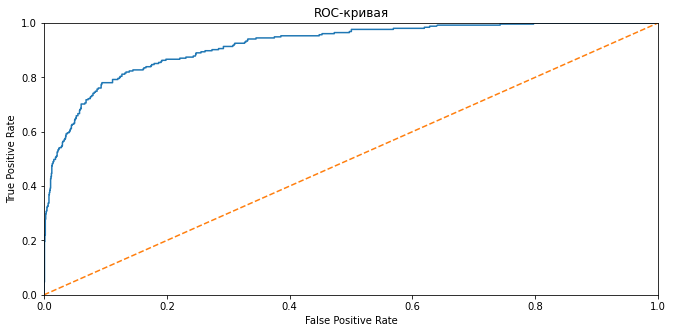

In [ ]:
print('ROC-AUC score', roc_auc_score(target_test, predicted_probalities))

fpr, tpr, thresholds = roc_curve(target_test, predicted_probalities)

plt.figure(figsize=(11, 5))

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

In [ ]:
predictions = ct_modgr.best_estimator_.predict(features_test)

In [ ]:
cmatrix = confusion_matrix(target_test, predictions)
cmatrix

array([[1356,  150],
       [  56,  199]])

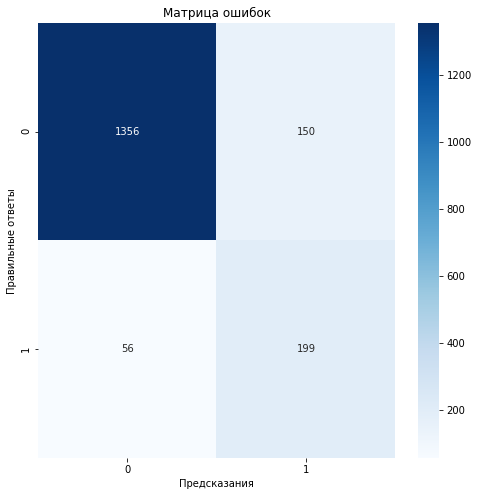

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix,
                annot=True,
                cmap='Blues',
                fmt='d').set(title='Матрица ошибок', xlabel='Предсказания', ylabel='Правильные ответы')
plt.show();

In [ ]:
feature_importance = pd.DataFrame(ct_modgr.best_estimator_.feature_importances_, index = features_test.columns, columns=['importances'])
feature_importance = feature_importance.sort_values(by='importances', ascending=False)
feature_importance

,importances
Stay,49.929799
TotalCharges,10.487295
MonthlyCharges,8.509689
Type_2,4.340606
Partner_1,2.559454
PaymentMethod_4,2.078227
Type_3,1.925511
MultipleLines_2,1.603850
DeviceProtection_1,1.508841
OnlineBackup_2,1.476558


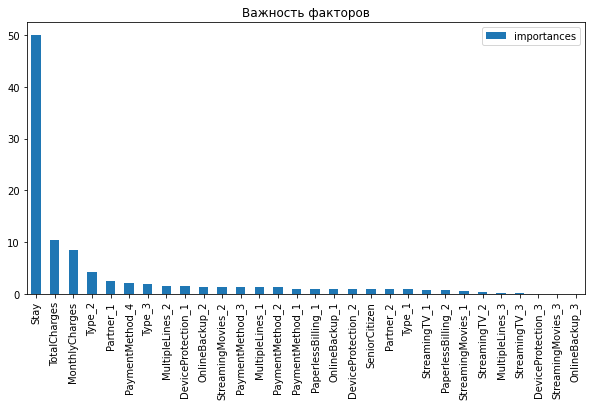

In [ ]:
feature_importance.plot(kind='bar', figsize=(10, 5), title='Важность факторов')
plt.show()

Лучший результат ROC-AUC 0.8827 за время 41 s на тренировочной выборке с кросс-валидацией показала модель CatBoostClassifier с гиперпараметрами 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.3. График roc_curve отражает показатели модели с этими гиперпараметрами на тестовой выборке ROC-AUC 0.9180, отмпетим, что это значительно больше чем 0,5 то есть кривая положителная, и кривая существенно различается от случайного резултата. Матрица ошибок показывает, что ошибается модель сравнительно редко, особенно что касается ложно отрицательных предсказаний. Анализ feature_importance показал, что названные выше(при Phik корреляции) 5 признаков('Stay','TotalCharges','MonthlyCharges', 'Partner','PaymentMethod')  действительно имеют большое влияние, однако feature_importance показало, что несравнимо большое влияиние оказывает признак 'Stay'(время в компании). Кроме того важным также оказался  тип оплаты услуг 'Type'.

# Третий этап. Отчет


1). Какие пункты плана были выполнены, а какие — нет (поясните почему)?

План cостоял из пяти пунктов в соответствии с ними выполнена работа:      
1.Изучена рабочая задача, она состояла в том,чтобы научиться прогнозировать отток клиентов у оператора связи «Ниединогоразрыва.ком».Рассмотрены описание всех полей(столбцов) 4 файлов с даными.   
2.Изучены данные в файлах - проверены типы, есть ли пропуски, надо ли преобразовывать данные. Сделан первичный вывод:   
Данные у нас представлены 4 отдельными таблицами, которые объедиянет customerID -код клиента, именно по нему можно будет объединить таблицы в один датасет, чтобы проводить действия с одной общей таблицей. В представленных таблицах отсутствуют пропуски, кроме небольшого количетсва неявных в TotalCharges. В данных таблиц contract_df и personal_df 7043 записи, по сути именно такое количество клиентов нам представлено для анализа.
Данных немного, поэтому будем вниметельны, чтобы при объединении таблиц сохранить их все, не удалять вероятные пропуски, а заполнить их подходящими для анализа значениями. Ведь в таблицах internet_df и phone_df меньше строк 5517 и 6361 соответственно, а значит при слиянии появятся пробелы.Причина не соответсвия количества записей скорее всего в том, что этими услугами некоторые абоненты не пользовались. BeginDate и EndDate надо перевести в формат даты, No в EndDate означает, что пользователь продолжает пользоваться услугами - это целевой признак.Нужно будет заменить No на 01.02.2020 в EndDate. TotalCharges надо перевести в числовой тип,заполнить неявные пропуски. MonthlyCharges в целочисленный.


3.Подготовены данные -проведена предобработка, выделен целевой признак, подготовлены фичи к обучению моделей.
В ходе предобработки изменен формат MonthlyCharges и TotalCharges на целочисленный. Заполнили неявные пропуски TotalCharges из соседней колонки MonthlyCharges,потому что выяснили, что это те  кто стали клиентами 2020-02-01, последнюю актуальную дату, у них в таблице прописаны расходы за месяц,получается их общие расходы равны месячным расходам.BeginDate и EndDate перевел в формат даты, No в EndDate означает, что пользователь продолжает пользоваться услугами - это целевой признак.Заменили No на 01.02.2020 в EndDate. Создали новый признак Stay(Пребывание), в  нем будет информация о времени (количество дней), сколько клиент в компании.   
Объединили четыре отдельных дата сета в один tecom_df.При объединении учли, что данных в таблицах contract_df и personal_df 7043 записи,а internet_df и phone_df меньше строк 5517 и 6361 соответственно. Заполнили появившиеся пропуски отметкой tel net для тех кто пользуется только телефоном или только интернетом, есть "искушение" поставить yes или no, но тогда будет искажение данных, например, что у тех, кто не пользуется телефоном нет мультисоединения, но есть одна линия, однако по факту у них нет вообще телефонной связи. Далее мы выделили целевой признак на основе EndDate создали Exit, где 0- клиент остается, 1 клиент прекратил пользоваться услугами. Удалили столбцы, которые уже не понадобятся для  исследования customerID, EndDate и BeginDate. Определили ,что в данных присутствует дисбаланс классов, учли при дальнейших действиях с параметрами моделей.   
Рассмотрели phik-корреляцию признаков, определили, что можно оставить признаки влияние которых хотя бы больше 0.05, из других заметно выделяются влиянием 5 признаков 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Stay', 'Partner', отметили их для дальнейшего исследования после сравнения выводов с feature_importances_. Удалили столбцы 'gender', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', тк их влияние по phik-корреляции совсем минимально, а именно ниже-равно 0.05. далее разделили выборку на тренировочную и тестовую, размер тестовой 0,25, установили параметр random_state=220523. Провели кодирование категориальных переменных с помощью OneHotEncoder.

4.Проведен выбор моделей, подбор гиперпараметров, проверка результатов, анализ лучшей модели.   
Для анализа выбрано 3 модели RandomForestClassifier, LGBMClassifier, CatBoostClassifier. Проведен подбор гиперпаратров с помощью GridSearchCV на кросс-валидации.У моделей выставлен параметр для балансировки классов, а также заданный random_state.Результаты лучшей модели проверены на тестовой выборке.Провден анализ лучшей модели:   
Лучший результат ROC-AUC 0.8827 за время 41 s на тренировочной выборке с кросс-валидацией показала модель CatBoostClassifier с гиперпараметрами 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.3. График roc_curve отражает показатели модели с этими гиперпараметрами на тестовой выборке ROC-AUC 0.9180, отмпетим, что это значительно больше чем 0,5 то есть кривая положителная, и кривая существенно различается от случайного резултата. Матрица ошибок показывает, что ошибается модель сравнительно редко, особенно что касается ложно отрицательных предсказаний. Анализ feature_importance показал, что названные выше(при Phik корреляции) 5 признаков('Stay','TotalCharges','MonthlyCharges', 'Partner','PaymentMethod')  действительно имеют большое влияние, однако feature_importance показало, что несравнимо большое влияиние оказывает признак 'Stay'(время в компании). Кроме того важным также оказался  тип оплаты услуг 'Type'.

5.Подготовлен итоговый вывод в виде данного отчета.   
Таким образом все пункты плана выполнены.

2). Какие трудности возникли и как вы их преодолели?   

В ходе исследования  возникло затруднение с кодированием категориальных переменных в данных, сначала был выбран неподходящий способ.В результате метрика была неадекватно высокой, почти 1.00. В последующем заменили его на OneHotEncoder из библиотеки category_encoders. Такой подход позволил провести необходимое кодирование и сохранить исходную информацию о названии столбцов с учетом кодирования, а также привести метрику к адекватному значению.

3). Какие ключевые шаги в решении задачи выделили?    

Т.к. работа модели строится на данных, то важно было их основательно подготовить, при этом не потерять, т.к их сравнительно немного.В связи с этим ключевым шагом считаю предобработку  данных в ходе которой был сформирован общий датасет, выделен ключевой признак, а также получен новый признак, который и стал основным для построненной модели.

4). Какая ваша итоговая модель, какие у нее гиперпараметры и какое у неё качество?   

Лучший результат ROC-AUC 0.8827 за время 41 s на тренировочной выборке с кросс-валидацией показала модель CatBoostClassifier с гиперпараметрами 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.3. Показатели модели с этими гиперпараметрами на тестовой выборке ROC-AUC 0.9180. Матрица ошибок показывает, что ошибается модель сравнительно редко, особенно что касается ложно отрицательных предсказаний.

5). Список признаков, используемых для получения лучшей модели, описание их предобработки.   

Перечислим признаки по мере убывания их влияния на целевой признак.
Stay, TotalCharges, MonthlyCharges, Type, Partner, PaymentMethod, MultipleLines, DeviceProtection, OnlineBackup, StreamingMovies, PaperlessBilling, SeniorCitizen, StreamingTV.
Признак Stay(Пребывание) создали как новый из разницы двух BeginDate и EndDate, в нем информация о времени (количество дней), сколько клиент в компании. Предварительно BeginDate и EndDate перевели в формат даты, заменили No на 01.02.2020 в EndDate.  Изменили формат MonthlyCharges и TotalCharges на целочисленный. Заполнили неявные пропуски TotalCharges из соседней колонки MonthlyCharges,потому что выяснили, что это те, кто стали клиентами 2020-02-01, последнюю актуальную дату, у них в таблице прописаны расходы за месяц,получается их общие расходы равны месячным расходам.   
Объединили четыре отдельных дата сета в один tecom_df.При объединении учли, что данных в таблицах contract_df и personal_df 7043 записи,а internet_df и phone_df меньше строк 5517 и 6361 соответственно. Заполнили появившиеся пропуски отметкой tel и net для тех кто пользуется только телефоном или только интернетом, хотя было "искушение" поставить yes или no, но тогда бы появилось искажение данных, например, что у тех, кто не пользуется телефоном нет мультисоединения, но есть одна линия, однако по факту у них нет вообще телефонной связи. Далее мы выделили целевой признак на основе EndDate создали Exit, где 0- клиент остается, 1 клиент прекратил пользоваться услугами. Удалили столбцы, которые уже не понадобятся для исследования customerID, EndDate и BeginDate. Определили ,что в данных присутствует дисбаланс классов, учли при дальнейших действиях с параметрами моделей.
Удалили столбцы 'gender', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', тк их влияние по phik-корреляции совсем минимально, а именно ниже-равно 0.05. далее разделили выборку на тренировочную и тестовую, размер тестовой 0,25, установили параметр random_state=220523. Провели кодирование категориальных переменных с помощью OneHotEncoder.